In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from keras.layers import Concatenate,MaxPool2D
from keras.models import Model
from keras.layers import Input, Dense, Conv2D,Flatten,Dropout,AvgPool2D
import os
import cv2
import keras
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
my_generator= ImageDataGenerator(rescale=1./255, validation_split=0.1) #rescaled the images
image_train = my_generator.flow_from_directory('/content/drive/MyDrive/Data/train', #this is the image generator next we need to read the data from it
        target_size=(150, 150),
        batch_size=32,
        class_mode='sparse',
        subset="training") #does not fully load the data into the memory instead it created a channel  
validation_image= my_generator.flow_from_directory('/content/drive/MyDrive/Data/train',
        target_size=(150, 150),
        batch_size=32,
        subset="validation",
        class_mode='sparse' )
test_image  = my_generator.flow_from_directory(directory='/content/drive/MyDrive/Data/test',
                                                 
                                                 target_size=(150, 150),
                                                 class_mode='sparse')

Found 11524 images belonging to 104 classes.
Found 1229 images belonging to 104 classes.
Found 3712 images belonging to 104 classes.


In [5]:
from tensorflow.keras.models import Model , load_model
from tensorflow.keras.layers import Input,Average
model1 = load_model('/content/drive/MyDrive/SimpleCNNBETTER')# address awel model 
model1=Model (inputs=model1.inputs,outputs=model1.outputs,name='Simple_CNN')

model2 = load_model('/content/drive/MyDrive/Vgg')# address awel model 
model2=Model(inputs=model2.inputs,outputs=model2.outputs,name='VGG')

models = [model1,model2]
model_input=Input(shape=(150,150,3))
model_outputs=[model(model_input)for model in models]
ensemble_output=Average()(model_outputs)
ensemble_model=Model(inputs=model_input,outputs=model_outputs,name='ensemble')


In [6]:
from keras.optimizers import Adam
import keras
OP= Adam(lr=0.0001)
ensemble_model.compile(optimizer=OP, loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])
hist=ensemble_model.fit(image_train ,validation_data= validation_image, epochs=10)

Epoch 1/10
361/361 [==============================] - 2535s 7s/step - loss: 6.9045 - Simple_CNN_loss: 3.7613 - VGG_loss: 3.1432 - Simple_CNN_accuracy: 0.1044 - VGG_accuracy: 0.2175 - val_loss: 6.5624 - val_Simple_CNN_loss: 3.7119 - val_VGG_loss: 2.8505 - val_Simple_CNN_accuracy: 0.1229 - val_VGG_accuracy: 0.2620
Epoch 2/10
361/361 [==============================] - 93s 259ms/step - loss: 6.2467 - Simple_CNN_loss: 3.7377 - VGG_loss: 2.5090 - Simple_CNN_accuracy: 0.1071 - VGG_accuracy: 0.3238 - val_loss: 6.3444 - val_Simple_CNN_loss: 3.7066 - val_VGG_loss: 2.6378 - val_Simple_CNN_accuracy: 0.1334 - val_VGG_accuracy: 0.3092
Epoch 3/10
361/361 [==============================] - 94s 259ms/step - loss: 5.6991 - Simple_CNN_loss: 3.7013 - VGG_loss: 1.9978 - Simple_CNN_accuracy: 0.1158 - VGG_accuracy: 0.4363 - val_loss: 6.2914 - val_Simple_CNN_loss: 3.6743 - val_VGG_loss: 2.6171 - val_Simple_CNN_accuracy: 0.1221 - val_VGG_accuracy: 0.3214
Epoch 4/10
361/361 [==============================] - 98

In [13]:
googlenet= ensemble_model.save('/content/drive/MyDrive/Ensemble')

In [11]:
for batch in test_image:
  x_test,y_test = batch
  print ( y_test )
  break

[99. 94. 79. 79. 57. 73. 77. 61. 84. 98. 10. 83. 22. 77. 68.  6. 48. 48.
 21. 74.  5. 56.  9.  6. 75. 76. 63. 68. 42.  6. 95.  0.]


In [14]:
score = ensemble_model.evaluate(test_image, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 8.574938774108887
Test accuracy: 3.6041183471679688


In [20]:
# Generate predictions (probabilities -- the output of the last layer)
# on new data using predict
print("Generate predictions for 32 samples")
predictions = ensemble_model.predict(test_image)

Generate predictions for 32 samples
116/116 [==============================] - 17s 142ms/step


In [23]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

KeyError: ignored

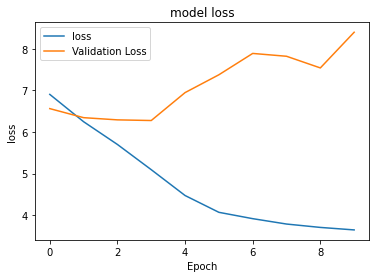

In [17]:

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("Epoch")
plt.legend(["loss","Validation Loss"])
plt.show()

In [18]:
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy"])
plt.show()

KeyError: ignored

In [24]:
testy = my_generator.flow_from_directory(
        directory='/content/drive/MyDrive/Data/test',
        target_size=(150, 150),
        batch_size=16474,
        class_mode='sparse')

for X_test, Y_test in testy:
   break

Found 3712 images belonging to 104 classes.


In [25]:
from sklearn.metrics import f1_score
y_true=testy.classes
y_pred=predictions
y_classes=[np.argmax(CLASSES) for CLASSES in y_pred]
f1_score(y_true, y_classes, average='macro')

ValueError: ignored